<a href="https://colab.research.google.com/github/kimgoden/myblog/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 모델

## Decison Tree
 - Decison Tree(결정트리) 는 분류, 회귀 모두 가능한 지도 학습 모델 중 하나다.
 - 결정 트리는 특정 기준(질문)에 따라 데이터를 구분하는 모델이다.
 - 이러한 방식으로 데이터를 분류하는 것은 스무고개와 유사한 방식으로 이루어진다.

 ![](/images/DecisonTree/tt.png)

 

### 결정트리 알고리즘
- 용어
   - Node(노드) : 결정트리에서 질문이나 정답을 담은 네모 상자(분기점)
   - Root Ndoe(루트노드) : 깊이가 0인 가장 위의 노드
   - Leaf Node(리프노드) : 자식 노드가 없는 마지막 노드
- 진행과정
  1. 첫번째로 root node(꼭대기)에서 시작한다.
  2. 다리가 있나요? 라는 질문을 검사한다(조건에 따라 좌우 분기)
  3. 만약 '아니' 라면 오른쪽으로 이동해 root node에서 했던 조건의 검사를 실시하여 반복한다.
  4. 마지막에 leaf node(끝) 에 도달했을 때, 추가적인 조건 검사 없이 가장 많은 클래스의 비중을 차지하고 있는 곳으로 클래스를 예측하게된다.(토끼,강아지)(고래,소라고동)


- 결정 트리의 장점은 스케일이나 평균으 원점에 맞추는 것같은 데이터 전처리가 거의 필요하지 않다. 또 매우 직관적이고 이해하기 쉬우며 동시에 해석력이 좋다.

- 반대로 방식이 매우 단순하기 때문에 이를 극복하기 위해 랜덤 포레스트(Random Forest)를 사용할 수 있다.
- 그러나 새로운 데이터가 반영될 때 마다 숲(Forest)를 다시 만들어줘야 하기 때문에 풀고자하는 문제에 비해 계산량이 많아진다는 단점이 있다.

### Decison Tree 예제
- 결정트리를 이해하기 쉽게 `Sklearn`에서 제공하는 데이터셋을 이용한 예제다.

In [26]:
from sklearn.tree import DecisionTreeClassifier
# 싸이킷런 데이터를 의사결정 트리를 임포트 해준다.
from sklearn.datasets import load_breast_cancer
# 싸이킷런에서 제공하는 유방암 데이터를 가져온다.
from sklearn.model_selection import train_test_split
# 분석에 이용할 train, test 함수를 선언해준다.

cancer = load_breast_cancer()
# 샘플 데이터(유방암 데이터)를 로드해준다.

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# 훈련, 테스트 데이터를 셔플해준다.

tree = DecisionTreeClassifier(random_state=0)
# 의사결정 트리 선언

tree.fit(X_train, y_train)
# 훈련 시작(모든 리프 노드를 사용한다)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
#점수를 출력한다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [27]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
#의사결정 트리 선언, 이때 트리 깊이(분기)를 제한해준다.

tree.fit(X_train, y_train)
#훈련시작, 이때 리프노드의 깊이를 제한한다.

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
#점수를 출력한다.



훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


- 결정 트리 모듈 시각화 및 분석
 + `export_graphviz` 함수를 이용해 트리를 시각화
 + `export_graphviz` 함수에 filled 매개변수를 True로 지정하면 노드의 클래스가 구분되도록 색으로 칠해진다.
 + 클래스 이름과 특성 이름을 매개변수로 전달

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

  + `graphviz` 모듈을 사용해 시각화한다.


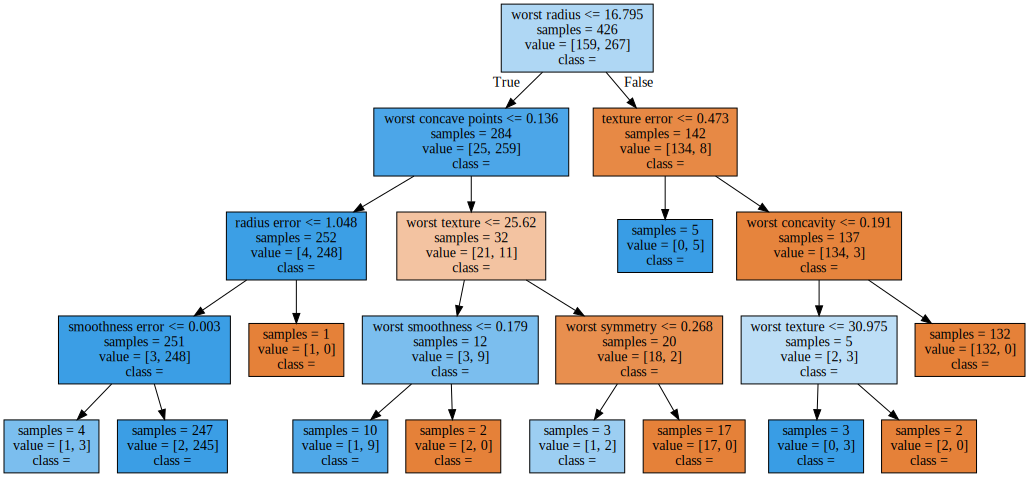

In [29]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 참고자료

- [머신러닝 - 4. 결정 트리](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree)
- [텐서 플로우 블로그 - 2.3.4 결정트리](https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-5-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC/#4)

- [유튜브 허민석 - 의사결정트리 알고리즘 쉽게 이해하기](https://youtu.be/n0p0120Gxqk)

